**Download Dataset**

In [2]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv -O titanic.csv


--2026-01-27 21:43:57--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.005s  

2026-01-27 21:43:57 (12.2 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [3]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df=df.drop(columns=['Cabin','PassengerId','Name','Ticket'])

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [13]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [14]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [16]:
df=pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True)


In [17]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
import torch

X_train=torch.tensor(X_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)

y_train=torch.tensor(y_train.values,dtype=torch.float32).view(-1,1)
y_test=torch.tensor(y_test.values,dtype=torch.float32).view(-1,1)

In [21]:
import torch.nn as nn

In [23]:
class TitanicMLP(nn.Module):
  def __init__(self,input_dim):
    super().__init__()
    self.layers=nn.Sequential(
        nn.Linear(input_dim,64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.ReLU(),
        nn.Linear(32,1)
    )

  def forward(self,x):
    if self.layers is None:
      raise Exception("Model not initialized")
    return self.layers(x)

In [24]:
input_dim = X_train.shape[1]
model = TitanicMLP(input_dim)


In [26]:
criterion=nn.BCEWithLogitsLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [27]:
epochs=50
for epoch in range(epochs):
  model.train()
  outputs=model(X_train)
  loss=criterion(outputs,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1)%10==0:
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/50], Loss: 0.6675
Epoch [20/50], Loss: 0.6343
Epoch [30/50], Loss: 0.5962
Epoch [40/50], Loss: 0.5495
Epoch [50/50], Loss: 0.5000


In [28]:
model.eval()
with torch.no_grad():
  test_logits=model(X_test)
  pred_probs=torch.sigmoid(test_logits)
  preds=(pred_probs>=0.5).float()

accuracy=(preds.eq(y_test).sum()/len(y_test)).item()

print(f"Test Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 80.45%


In [29]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
y_true = y_test.numpy()
y_pred = preds.numpy()
y_prob = pred_probs.numpy()


In [31]:
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("AUC Score:", roc_auc_score(y_true, y_prob))


Precision: 0.7910447761194029
Recall: 0.7162162162162162
F1 Score: 0.75177304964539
AUC Score: 0.8761904761904761


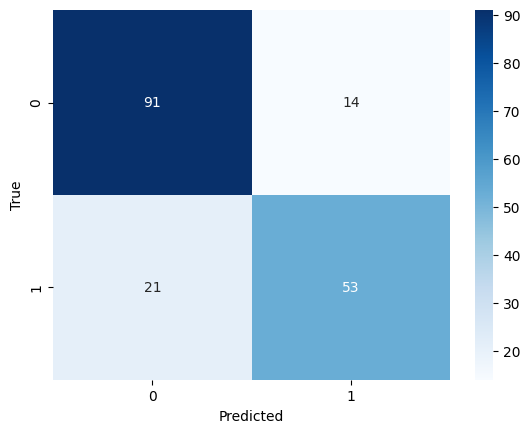

In [32]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


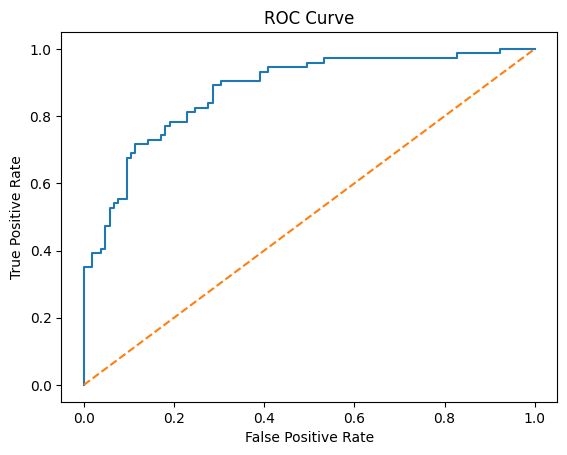

In [33]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
